In [1]:
#goal is to collect some demographic information using the patient class 

functions and classes

In [2]:
class patient:
    def __init__(self, filepath, input_fileName, lengthPtID):
        ptID = input_fileName[:lengthPtID]
        self.ptID = ptID
        self.fileName = input_fileName
        #find the demographics in one of two sheets
        # directory = os.getcwd()
        file_adds = filepath + '/' + input_fileName
        file = pd.ExcelFile(file_adds)
        sheet_Names = file.sheet_names
        if 'Cancer_Registery Data' in sheet_Names:
            #do the thing for getting patient info
            df = pd.read_excel(input_fileName, sheet_name= 'Cancer_Registery Data')
            self.ptDemographics = df
            self.amyloid_status = df.at[0,"Amyloid Status"]
            self.survival = df.at[0,"Survival Time (Months)"]
            self.ageDx = df.at[0,"Age At Diagnosis"] 
            self.sex = df.at[0,"Gender Cancer Registry"]
            self.vitalStatus = df.at[0, "Vital Status Cancer Registry"]
            self.dx = df.at[0, "Histology"]

        elif '30 Cerner Patients ' in sheet_Names:
            #do the thing for getting patient info
            df = pd.read_excel(input_fileName, sheet_name= '30 Cerner Patients ')
            self.ptDemographics = df
            self.amyloid_status = df.at[0,"Amyloid Status"]
            self.survival = df.at[0,"Survival Time (months)"]
            self.ageDx = df.at[0,"Age At Diagnosis"] 
            self.sex = df.at[0,"Gender Cerner"]
            self.vitalStatus = df.at[0, "Vital Status (Cerner)"]
            self.dx = df.at[0, "Primary Site"]


        else: print("no patient identifying information")

        #now iterate through the list of sheets to import the patient data 
        if 'Labs' in sheet_Names:
            self.labsData = pd.read_excel(input_fileName, sheet_name= 'Labs')
        else: self.labsData = False
        
        if 'amyloid in subject' in sheet_Names:
            self.echoData = pd.read_excel(input_fileName, sheet_name= 'amyloid in subject')
        else: self.echoData = False

        if 'ChemoTx' in sheet_Names:
            self.ChemoTx = pd.read_excel(input_fileName, sheet_name= 'ChemoTx')
        else: self.ChemoTx = False

        if 'Hematologic Tx' in sheet_Names:
            self.HemeTx = pd.read_excel(input_fileName, sheet_name= 'Hematologic Tx')
        else: self.HemeTx = False

        if 'Immuno Tx' in sheet_Names:
            self.ImmunoTx = pd.read_excel(input_fileName, sheet_name= 'Immuno Tx')
        else: self.ImmunoTx = False

        if 'Radiation Tx' in sheet_Names:
            self.RadTx = pd.read_excel(input_fileName, sheet_name= 'Radiation Tx')
        else: self.RadTx = False

        if 'Other Tx' in sheet_Names:
            self.OtherTx = pd.read_excel(input_fileName, sheet_name = 'Other Tx')
        else: self.OtherTx = False

        if 'Physican_Notes' in sheet_Names:
            self.MDnotes = pd.read_excel(input_fileName, sheet_name= 'Physican_Notes')
        else: self.MDnotes = False

        #to create a callable list of treatments recieved for which we have data
        tx_sheets = ['ChemoTx', 'Hematologic Tx', 'Immuno Tx']
        treatmentTypesRecieved = []

        for possible in tx_sheets:
        
            if possible in sheet_Names:
                treatmentTypesRecieved.append(possible)
        self.txRecieved = treatmentTypesRecieved

In [3]:
def FilterList(list, keyWords_primary, keyWords_secondary = "Empty", omit = "Empty"):
    #store the filtered result
    filteredList = []

    if keyWords_secondary == "Empty":
        for c in list: #loop the columns
            for buzz in keyWords_primary: #loop the key words
                if buzz in c: #if the column contains the key word
                    filteredList.append(c) #add the column to the list
    
    else: 
        for c in list: #loop the columns
            for buzz in keyWords_primary: #loop the key words
                if buzz in c: #if the column contains the key word
                    for secondary in keyWords_secondary:
                        if secondary in c:
                            filteredList.append(c) #add the column to the list
         
    if omit != "Empty": 
        for a in filteredList:
            for x in omit:
                if x in a:
                    filteredList.remove(a)
    
    #by iterating through the column names first, we keep the order of the columns

    return filteredList 

In [4]:
#createBinary function
def createBinary(df, listOfLabs, timeColumn): 
    df_new = pd.DataFrame(columns = timeColumn + listOfLabs)
    #populate the new dataframe
    df_new[timeColumn] = df[timeColumn]
    for col in listOfLabs:
        df_new[col] = df[col]
    #make binary 
    df_new_bool = df_new.astype(bool)
    df_new_int = df_new_bool.astype(int)
    return df_new_int

def createBinarySum(df, listOfLabs, timeColumn):
    df_new = pd.DataFrame(columns = timeColumn + listOfLabs)
    #populate the new dataframe
    df_new[timeColumn] = df[timeColumn]
    for col in listOfLabs:
        df_new[col] = df[col]
    #make binary 
    df_new_bool = df_new.astype(bool)
    df_new_int = df_new_bool.astype(int)
    #sum across the row
    df_new_sum = df_new_int.sum(axis = 1)
    return df_new_sum

In [5]:
#get list of patients from directory 
def GetListOfPatientsFromDirectory (directory, fileExtension, fileCommon, lengthID):
    #get the directory 
    listFileNames = os.listdir(directory)
    outputList = []
    #loop through list of fileNames: 
    for file in listFileNames:
        #id if the file is patient data
        if fileCommon in file and file.endswith(fileExtension):
            #trim the file name to the pt ID
            ptID = file[:lengthID]
            outputList.append(ptID)
    return outputList

In [ ]:
def GetListofPTfiles(directory, fileExtension, fileCommon):
    listFileNames = os.listdir(directory)
    outListFiles = []
    #loop through file names
    for file in listFileNames:
        if fileCommon in file and file.endswith(fileExtension):
            outListFiles.append(file)
    return outListFiles

In [8]:
def getNormalValue(filteredDataColumn, skipValue = 6666):
    test = filteredDataColumn
    #input is a series
    
    for entry in test:
        if entry != skipValue:
            outputValue = entry
                # print("this is output: ", outputValue)
                #set x to True
            break
        else:
            # print("entry is blank")
            pass
    return outputValue

In [9]:
#get amyloid status dictionary inputs, sort ptIDs to lists based on amyloid status 
def getListSortedByAmyloid(amyloidDictionary, listPositive, listNegative, listOther,
                           statusPositive = "yes", statusNegative = "no"):
    for pt in amyloidDictionary.keys():
        status = amyloidDictionary[pt]
        if status == statusPositive:
            listPositive.append(pt)
        elif status == statusNegative:
            listNegative.append(pt)
        else:
            listOther.append(pt)
    #does not check for double listed patient IDs

In [10]:
#function for masking a dataframe 
def patientSectionOfFrame(start_frame, sheet_name, column_toMask, ptID):
    #ptID is a row parameter in the column_toMask
    df_use = start_frame #copy of the frame

    #first check if sheet has the column of interest
    data_top = list(start_frame.columns) #returns the headers as a list

    #determine of the sheet contains the column of interest
    if data_top.count(column_toMask) > 0: 
        #if true, now find if the patient is present
        searchForPt = start_frame[column_toMask].str.startswith(ptID).sum() #returns the number of instances of the patient
        if searchForPt > 0:
            #patient is present 
            #mask the data for the patient
            df_clean = df_use.dropna(subset= [column_toMask]) #removing NA 
            mask = df_clean[column_toMask].str.startswith(ptID) #masking for the rows where the patient has data
            df_sub_tosave = df_clean[mask] #output dataframe filtered for the patient
            return df_sub_tosave
        else:
            #the patient isn't present
            # return print("The patient " + ptID + " is not in " + sheet_name)
            pass
    else:
        #the column of interest isn't present
        # return print("The column " + column_toMask + " is not in the sheet " + sheet_name)
        pass



In [11]:
def outputToExcel(df_data, fileName_header, fileName_Common, fileName_suffix,
                  parent_dir, folderName, sheetName):
    fileName = fileName_header + fileName_Common + fileName_suffix
    outfile_extension = '.xlsx'
    outfile_boxplts = fileName + outfile_extension
    path_out= os.path.join(parent_dir, folderName, outfile_boxplts)

    if os.path.exists(path_out):
            #if old sheet
            with pd.ExcelWriter(path_out, mode = 'a', if_sheet_exists = 'overlay') as writer:
                    df_data.to_excel(writer, sheet_name = sheetName, index = True)
    else: 
            #new sheet
            with pd.ExcelWriter(path_out) as writer:
                    df_data.to_excel(writer, sheet_name = sheetName, index = True) #if new sheet
    
def outputFiguresPath(fileName_header, fileName_mid, fileName_suff, parent_dir, folderName):
        fileName_header = str(fileName_header)
        fileName_mid = str(fileName_mid)
        fileName_suff = str(fileName_suff)

        #cleaning the input to prevent addition of / to the directory
        fileName_header = fileName_header.replace("/", "-")
        fileName_mid = fileName_mid.replace("/", "-")
        fileName_suff = fileName_suff.replace("/", "-")

        fileName = fileName_header + fileName_mid +fileName_suff
        out_filename = fileName + '.tif'
        new_filepath = os.path.join(parent_dir, folderName, out_filename)
        #the output path can be used to save the figure
        return new_filepath
        # plt.savefig(new_filepath, bbox_inches = 'tight')

def makeFolderPathForData(parent_dir, folderName_header, folderName_common, folderName_suffix):
    #makes a new directory for your files
    #returns the folder name for use in other functions
    folderName = folderName_header + folderName_common + folderName_suffix
    path = os.path.join(parent_dir,folderName)
    if not os.path.exists(path):
        os.mkdir(path)
    return folderName

libraries and dirrectories 

In [12]:
#libraries and dirrectory 
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit


In [13]:
#location of original data
starting_directory = os.getcwd()

new_dirrectory = 'C:/Users/maega/Documents/3000 PhD/3300_BEAT Labs/Projects/Cardiac-Amyloidosis-Multiple-Myeloma/012 Processed Data/data-2024-06-05'
os.chdir(new_dirrectory)

importing patient data


In [14]:
#importing patient data as dictionaries of dataframes
ptID_test = "E-01"

#build a dictionary of patients and their values 
ptFiles = GetListofPTfiles(new_dirrectory, '.xlsx', 'data')

patientDictAmyloid = {}
patientDictSurvival = {}
patientDictLabs = {}
patientDictEcho = {}
patientDictNotes = {}
patientDictDx = {}
patientDictVitalStatus = {}
patientDictSex = {}
patientDictAge = {}
patientDictChemo = {}
patientDictImmuno = {}
patientDictHeme = {}
patientDictRad = {}
patientDictOther = {}

#loop through the listOfPatients 
for file in ptFiles: 
    pt = patient(new_dirrectory, file, 4)
    patientDictAmyloid[pt.ptID] = pt.amyloid_status
    patientDictSurvival[pt.ptID] = pt.survival
    patientDictLabs[pt.ptID] = pt.labsData
    patientDictEcho[pt.ptID] = pt.echoData
    patientDictNotes[pt.ptID] = pt.MDnotes
    patientDictDx[pt.ptID] = pt.dx
    patientDictVitalStatus[pt.ptID] = pt.vitalStatus
    patientDictSex[pt.ptID] = pt.sex
    patientDictAge[pt.ptID] = pt.ageDx
    patientDictChemo[pt.ptID] = pt.ChemoTx
    patientDictImmuno[pt.ptID] = pt.ImmunoTx
    patientDictHeme[pt.ptID] = pt.HemeTx
    patientDictRad[pt.ptID] = pt.RadTx
    patientDictOther[pt.ptID] = pt.OtherTx
    

#calling patient to test 
ptLabsTest = patientDictLabs[ptID_test]

In [15]:
EchoTimeColumn ='time from diagnosis to first echo (months)'
echoDates = {}
for pt in patientDictEcho:
    ptEchoData = patientDictEcho[pt]
    patientEchoDate = ptEchoData[EchoTimeColumn]
    if 'none' not in list(patientEchoDate):
        echoDates[pt] = patientEchoDate

In [16]:
#list of patients by amyloid status 

listPositive = []
listNegative = []
listOther = []

getListSortedByAmyloid(patientDictAmyloid, listPositive= listPositive,
                       listNegative=listNegative, listOther=listOther)

amyloid positive patients

In [17]:
#from the patient positive generate some demographics

#age distribution
dataAges = []
dataSex = []

for pt in listPositive:
    data = patientDictAge[pt]
    dataAges.append(data)
df_ages = pd.Series(dataAges)
print("These are the characteristics of age: ", df_ages.describe())

#sex distribution 

#dx distribution MM and MGUS

#characteristics of NT-proBNP 
dataBNP = []
for pt in listPositive:
    data = patientDictLabs[pt]
    #get the one lab
    bnp_forpt = data['NT Pro BNP (B-Type Natriuretic Peptide)']
    bnp_clean = bnp_forpt.dropna()
    bnp_mean
    dataBNP.extend(bnp_clean)
df_bnp = pd.Series(dataBNP)
print("These are the characteristics of NT-pro BNP: ", df_bnp.describe())

#kappa-lambda ratio
dataKLRatio = []
for pt in listPositive:
    data = patientDictLabs[pt]
    #get the one lab
    KLRatio_forpt = data['Kappa/Lambda Free Light Chain Ratio Result']
    KLRatio_clean = KLRatio_forpt.dropna()
    dataKLRatio.extend(KLRatio_clean)
df_KLRatio = pd.Series(dataKLRatio)
print("These are the characteristics of kappa-lambda ratio: ", df_KLRatio.describe())

# m-spike 
dataMspike = []
for pt in listPositive:
    data = patientDictLabs[pt]
    #get the one lab
    Mspike_forpt = data['Serum Electrophoresis M Spike Result']
    Mspike_clean = Mspike_forpt.dropna()
    dataMspike.extend(Mspike_clean)
df_Mspike = pd.Series(dataMspike)
print("These are the characteristics of M-spike: ", df_Mspike.describe())

These are the characteristics of age:  count    24.000000
mean     62.458333
std      10.962304
min      36.000000
25%      56.750000
50%      65.500000
75%      70.000000
max      80.000000
dtype: float64
These are the characteristics of NT-pro BNP:  count      116.000000
mean      3964.232759
std       6095.663534
min         94.000000
25%        637.250000
50%       1457.500000
75%       5395.500000
max      40804.000000
dtype: float64
These are the characteristics of kappa-lambda ratio:  count    248.000000
mean       4.093952
std        9.724629
min        0.010000
25%        0.200000
50%        1.690000
75%        4.130000
max       99.690000
dtype: float64
These are the characteristics of M-spike:  count    147.000000
mean       0.500680
std        0.485615
min        0.100000
25%        0.200000
50%        0.300000
75%        0.600000
max        2.500000
dtype: float64


In [18]:
#dictionary for the filtered data
#this enables filtering of the patient data as its own block of code
dictOfFilteredLabs = {}
dictOfNormalRanges = {}

#other input values to set outside of loop 
x_column_name = "RelTime(Days)"

In [19]:
#creating dictionaries for all patients in the dirrectory 
for ptID_test in (patientDictLabs.keys()):
    #to collect and filter the patient labs into a dictionary
    df_Labs = patientDictLabs[ptID_test]

    orig_columns = df_Labs.columns

    #filter the patient labs
    columnNames = FilterList(orig_columns, keyWords_primary = ['Result', 'Troponin-T', 'BNP'],  
                                omit = ['Method'])
    
    testNames = [x_column_name]
    testNames.extend(columnNames) #addition of time label


    ptLabs_results= df_Labs[testNames] #new data frame of just results

    #troponin contains strings which mess up plotting 
    df_Labs_results_2 = ptLabs_results
    for col in columnNames:
        df_Labs_results_2[col] = ptLabs_results[col].apply(lambda x: 0 if isinstance(x, str) else x)
    ptLabs_results_2 = df_Labs_results_2
    dictOfFilteredLabs[ptID_test] = ptLabs_results_2

#saving the list of column names 
df_columnNames = pd.DataFrame(columnNames)
sub_dir = "C:/Users/maega/Documents/3000 PhD/3300_BEAT Labs/Projects/Cardiac-Amyloidosis-Multiple-Myeloma/012 Processed Data"
folderNameout = "PtLabsFiltered_2024-06-26_v1"
dateTag = "-20240626"
outputToExcel(df_columnNames, fileName_header="ColNames", fileName_Common="-resultCols", fileName_suffix=dateTag,
              parent_dir=sub_dir, folderName=folderNameout, sheetName= "all data")

C:\Users\maega\AppData\Local\Temp\ipykernel_32192\2547407632.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Labs_results_2[col] = ptLabs_results[col].apply(lambda x: 0 if isinstance(x, str) else x)
C:\Users\maega\AppData\Local\Temp\ipykernel_32192\2547407632.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Labs_results_2[col] = ptLabs_results[col].apply(lambda x: 0 if isinstance(x, str) else x)
C:\Users\maega\AppData\Local\Temp\ipykernel_32192\2547407632.py:21: SettingWithCopyWarning: 
A val

In [20]:
#usinig the filtered labs dictionary, create a new dataframe consisting of only the patients of a particular amyloid status
#create the dataframe
columnsForNewDataframe = ["ptID", x_column_name]
columnsForNewDataframe = columnsForNewDataframe.append(columnNames)
df_allLabsFiltered = pd.DataFrame(columns = columnsForNewDataframe)


for pt in list(dictOfFilteredLabs.keys()): 
    labsforpt = dictOfFilteredLabs[pt]

    #generate a list of length = len(x_column_name) containing only the ptID
    ptIDlabel_list = []
    i=0
    while i < len(labsforpt[x_column_name]):
        ptIDlabel_list.append(pt)
        i = i+1

    labsforpt_2 = labsforpt.assign(ptID = ptIDlabel_list)

    df_allLabsFiltered = df_allLabsFiltered._append(labsforpt_2, ignore_index = True)

# #save this output some where for yourself 
sub_dir = "C:/Users/maega/Documents/3000 PhD/3300_BEAT Labs/Projects/Cardiac-Amyloidosis-Multiple-Myeloma/012 Processed Data"
folderNameout = "PtLabsFiltered_2024-06-26_v1"
dateTag = "-20240626"
outputToExcel(df_allLabsFiltered, fileName_header="AllLabs-AllPt", fileName_Common="-filtered", fileName_suffix=dateTag,
              parent_dir=sub_dir, folderName=folderNameout, sheetName= "all data")



C:\Users\maega\AppData\Local\Temp\ipykernel_32192\2213461615.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_allLabsFiltered = df_allLabsFiltered._append(labsforpt_2, ignore_index = True)
C:\Users\maega\AppData\Local\Temp\ipykernel_32192\2213461615.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_allLabsFiltered = df_allLabsFiltered._append(labsforpt_2, ignore_index = True)
C:\Users\maega\AppData\Local\Temp\ipykernel_32192\2213461615.py:20: FutureWarning: The behavior of DataFrame

In [36]:
#get binary sum of the data to see which are the most common labs 
df_binarySum = createBinarySum(df_allLabsFiltered, listOfLabs=columnNames, timeColumn= x_column_name, defaxis=0)
df_sorted_binary = df_binarySum.sort_values(axis = 0, ascending=False)

#save this output somewhere for later
sub_dir = "C:/Users/maega/Documents/3000 PhD/3300_BEAT Labs/Projects/Cardiac-Amyloidosis-Multiple-Myeloma/012 Processed Data"
folderNameout = "PtLabsFiltered_2024-06-26_v1"
dateTag = "-20240626"
outputToExcel(df_sorted_binary, fileName_header="AllLabs", fileName_Common="-Frequency", fileName_suffix=dateTag,
              parent_dir=sub_dir, folderName=folderNameout, sheetName= "Frequency")

sorted_columnNames = list(df_sorted_binary.index)

slices_sorted = [sorted_columnNames[i:i + 26] for i in range(0, len(sorted_columnNames), 26)]


In [22]:
#using missingno
for i, slice in enumerate(slices_sorted):
    dataToPlot = df_allLabsFiltered[slice]
    # fig, ax= plt.subplots()
    msno.matrix(dataToPlot)
    sub_dir = "C:/Users/maega/Documents/3000 PhD/3300_BEAT Labs/Projects/Cardiac-Amyloidosis-Multiple-Myeloma/012 Processed Data"
    folderNameout = "PtLabsFiltered_2024-06-26_v1"
    dateTag = "-20240626"
    matrixOutPath = outputFiguresPath(fileName_header= "datafreq-", fileName_mid= i, fileName_suff="-matrix"+dateTag, 
                      parent_dir=sub_dir, folderName=folderNameout)
    plt.savefig(matrixOutPath, bbox_inches = 'tight')
    fig, ax= plt.subplots()
    msno.bar(dataToPlot, sort="descending")
    barOutPath = outputFiguresPath(fileName_header= "datafreq-", fileName_mid= i, fileName_suff="-bar"+dateTag, 
                    parent_dir=sub_dir, folderName=folderNameout)
    plt.savefig(barOutPath, bbox_inches = 'tight')
    plt.close("all")




In [23]:


# Generate a color palette with a unique color for each patient
unique_patients = df_allLabsFiltered['ptID'].unique()
num_patients = len(unique_patients)
palette = sns.color_palette("plasma", num_patients)
patient_color_map = {patient: palette[i] for i, patient in enumerate(unique_patients)}

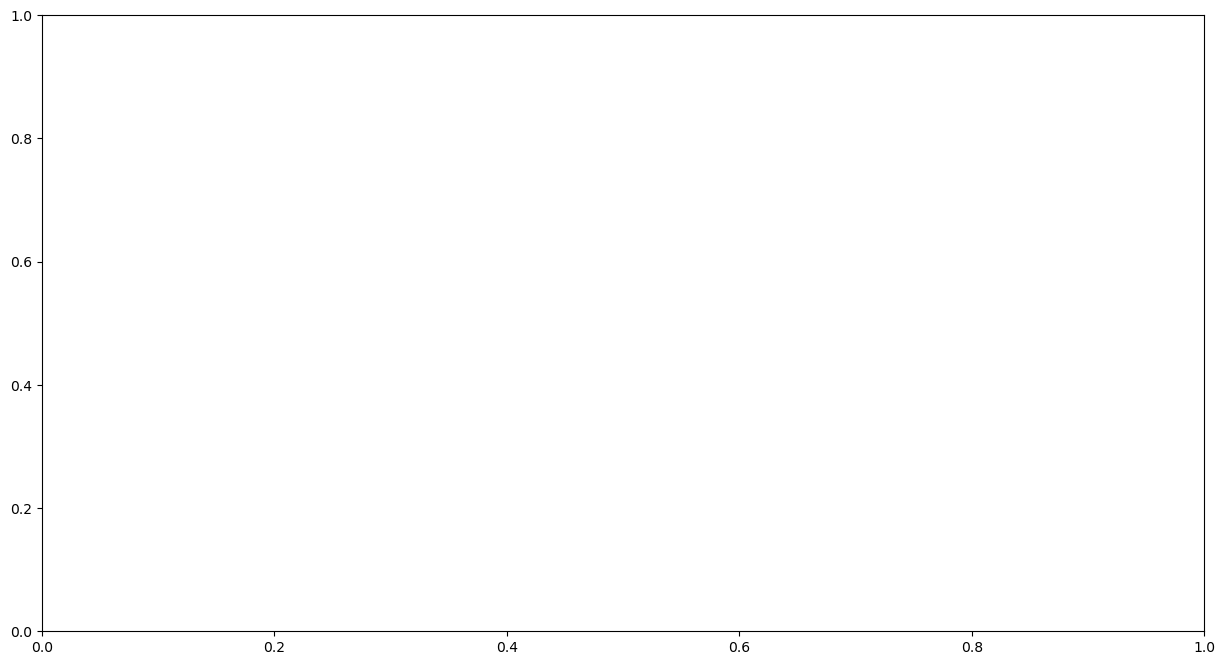

In [34]:
fig, ax = plt.subplots(figsize=(15, 8))
listLabs = []


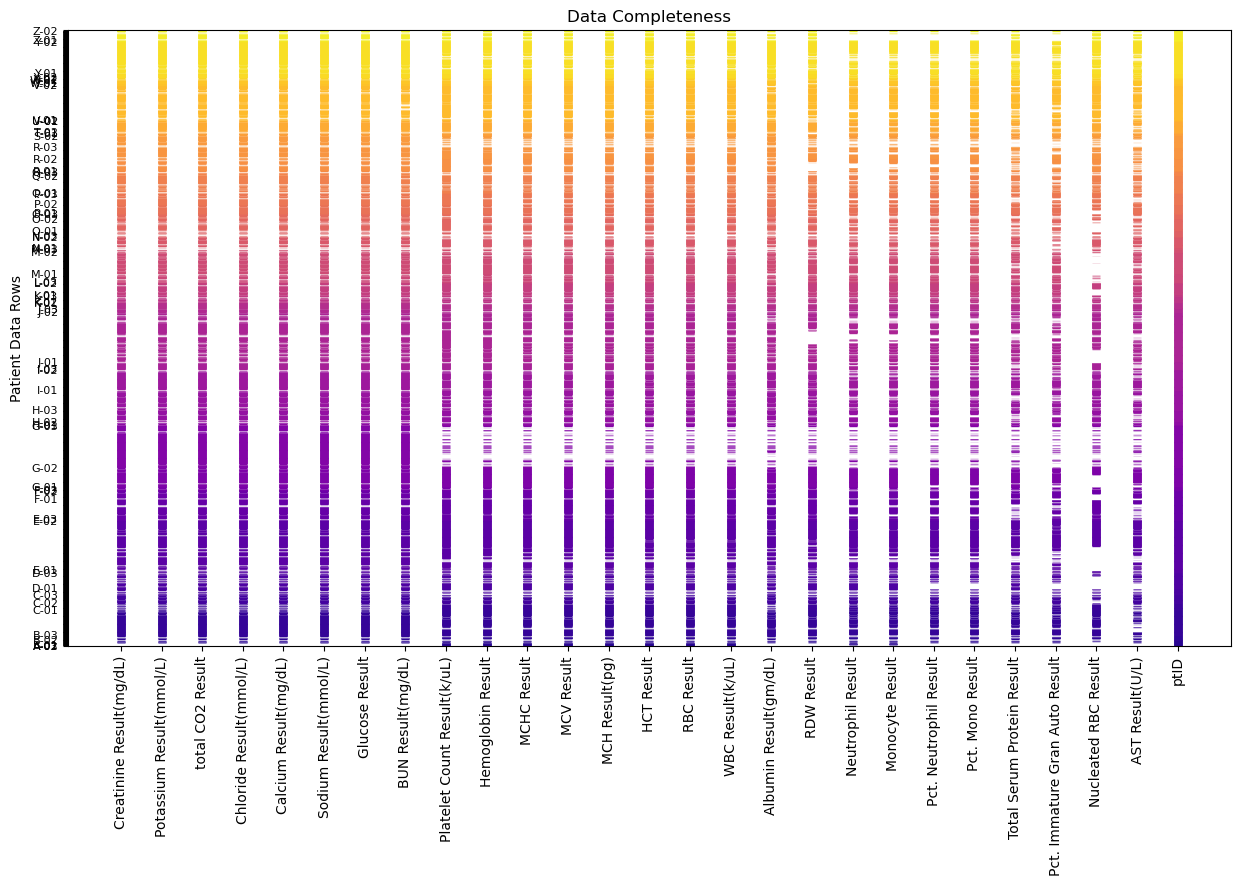

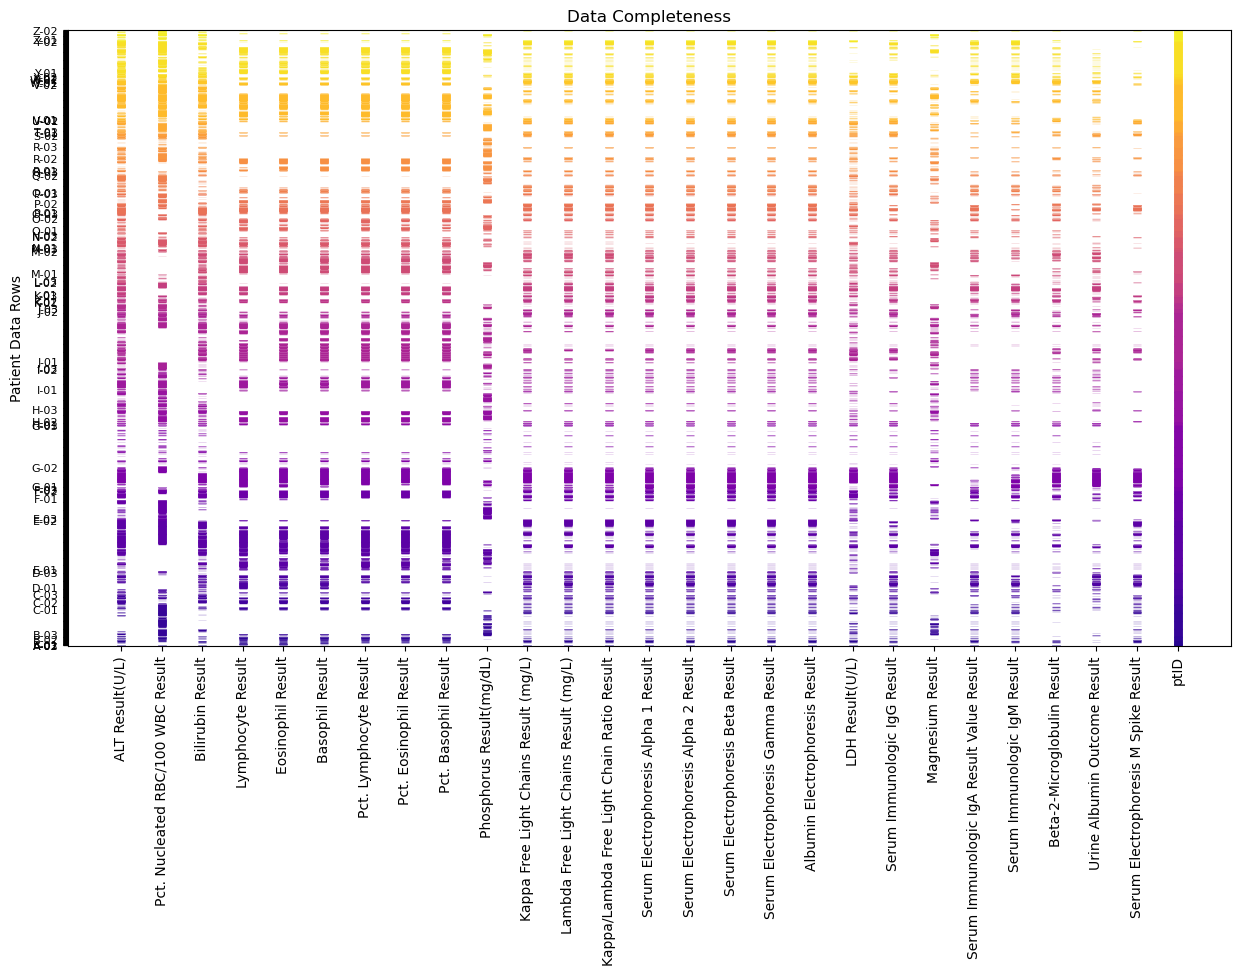

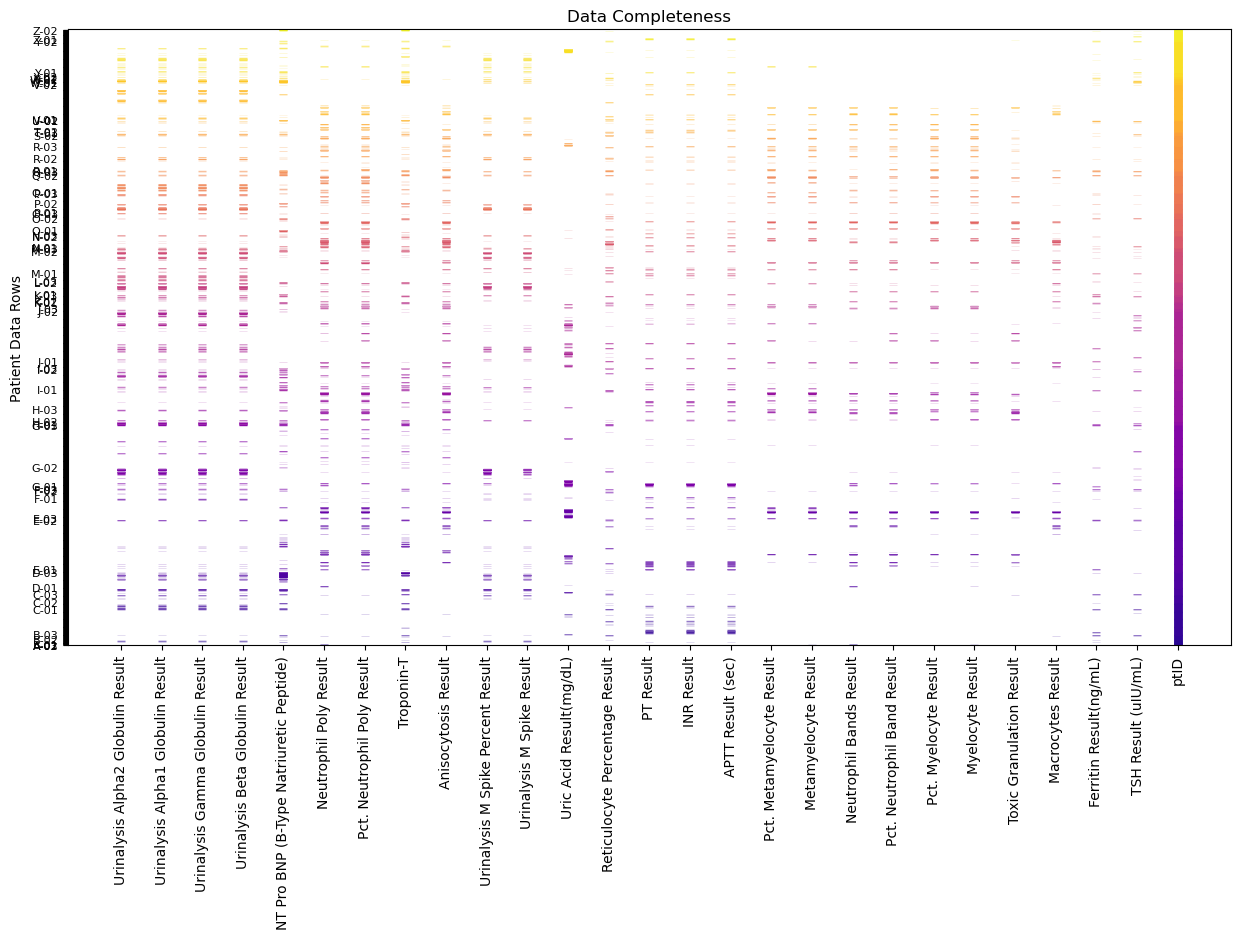

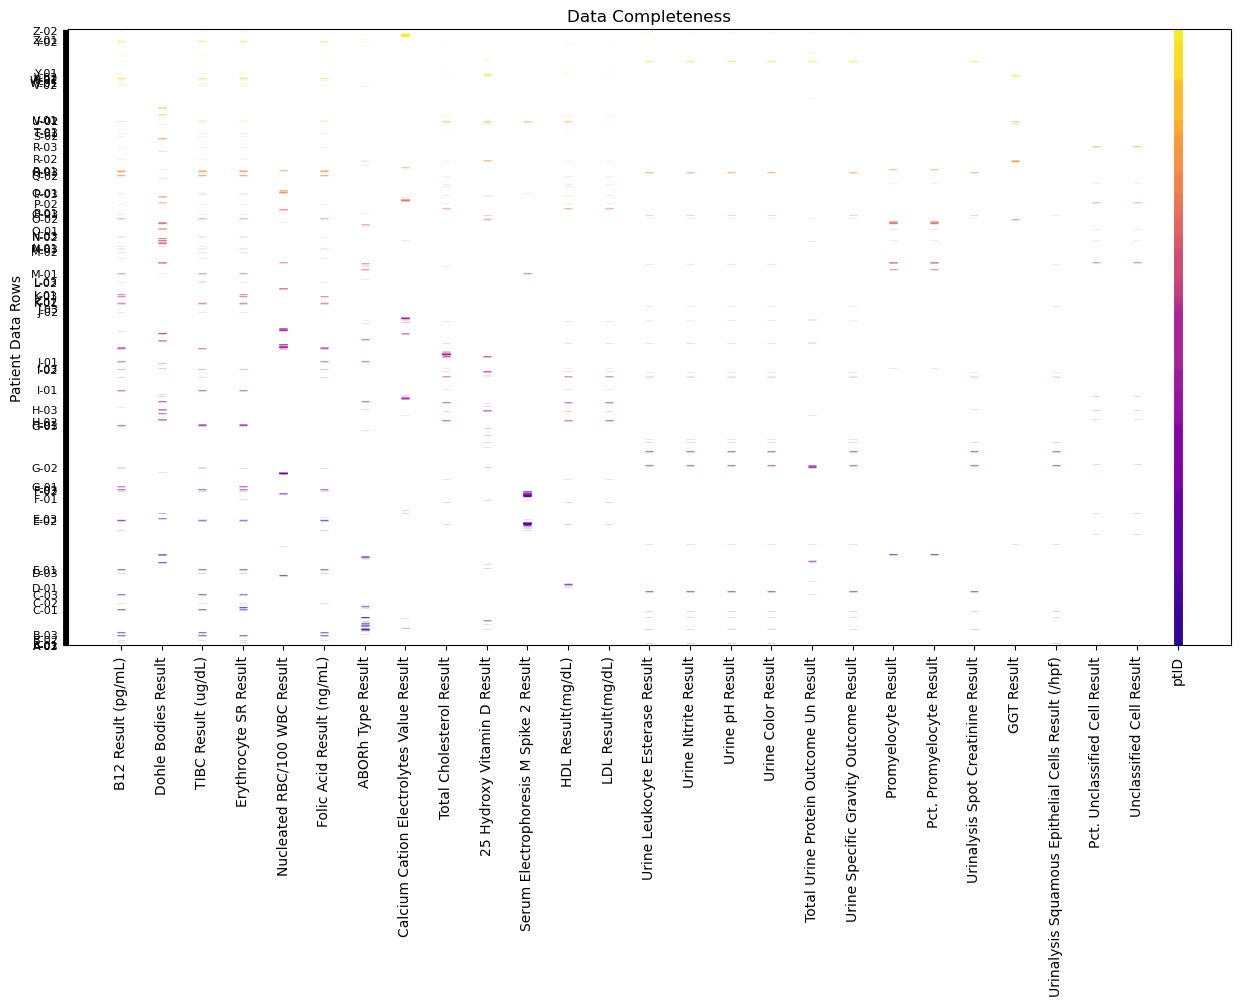

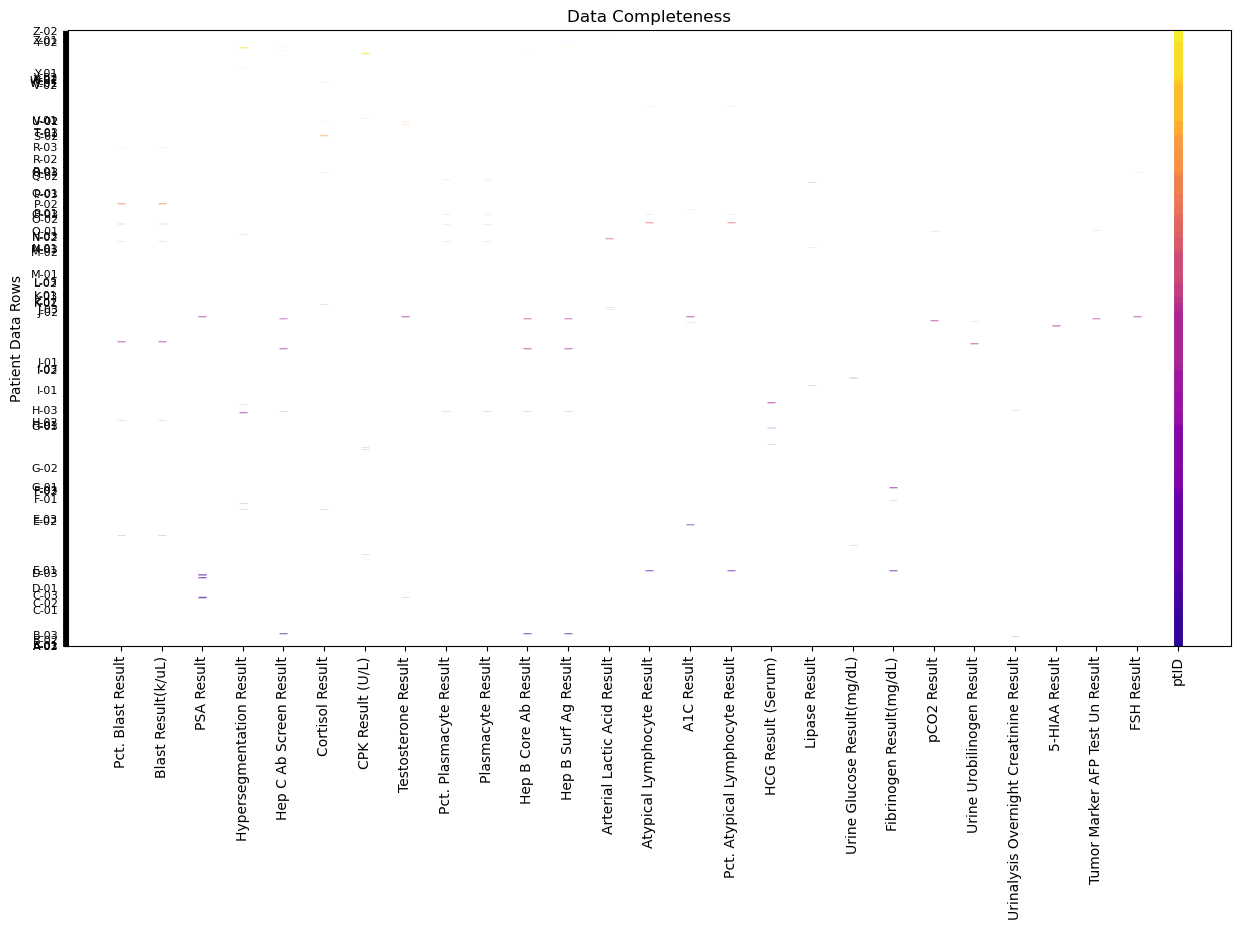

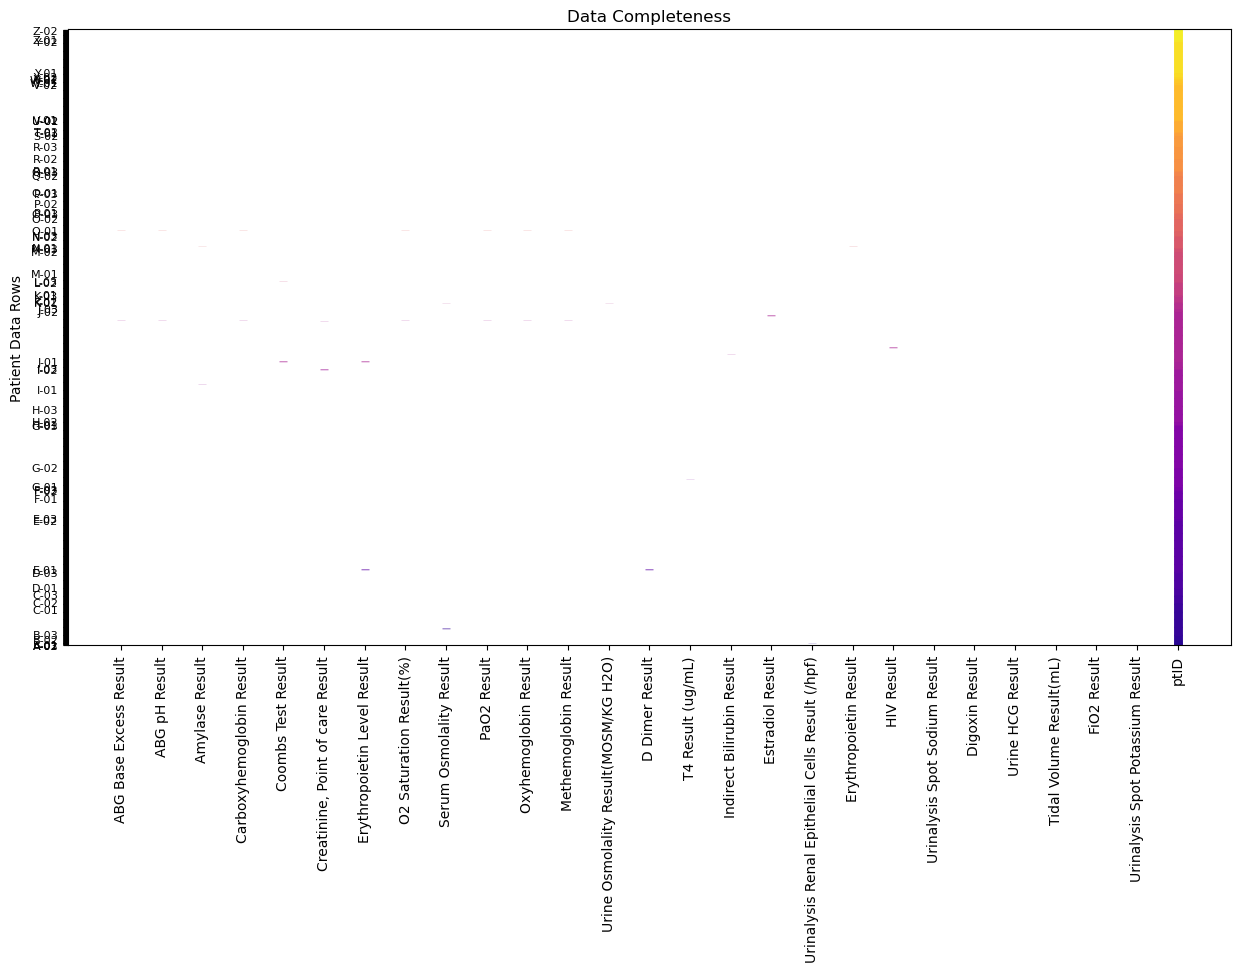

In [40]:
for numb, slice in enumerate(slices_sorted):
    listLabs = slice.copy()
    addCol = ['ptID']
    listLabs.extend(addCol)
    dataToPlot = df_allLabsFiltered[listLabs]

    # Create a DataFrame to indicate the presence (1) or absence (0) of data
    presence_matrix = dataToPlot.notnull().astype(int)

    # Plot each row of data, coloring by patient and highlighting null values
    fig, ax = plt.subplots(figsize=(15, 8))
    for idx, row in dataToPlot.iterrows():
        ptID = row['ptID']
        color = patient_color_map[ptID]
        y_values = presence_matrix.loc[idx].values
        for j, value in enumerate(y_values):
            if value == 1:
                ax.plot(j, idx, '_', color=color)
            else:
                ax.plot(j, idx, '_', color='white', markersize=10)

    # Customize the plot
    ax.set_xticks(range(len(presence_matrix.columns))) 
    ax.set_xticklabels(presence_matrix.columns, rotation = 'vertical')  
    # Create y-tick labels only for the first instance of each patient
    y_ticks = []
    y_ticklabels = []
    for i in range(len(dataToPlot)):
        if i == 0 or dataToPlot['ptID'].iloc[i] != dataToPlot['ptID'].iloc[i - 1]:
            y_ticks.append(i)
            y_ticklabels.append(dataToPlot['ptID'].iloc[i])
        else:
            y_ticks.append(i)
            y_ticklabels.append('')

    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_ticklabels, size = 8)
    # ax.set_xlabel('Lab Results')
    ax.set_ylabel('Patient Data Rows')
    ax.set_ylim([-1, len(dataToPlot)])
    # ax.legend(handles=[plt.Line2D([0], [0], marker='o', color=palette[i], label=unique_patients[i], linestyle='') 
    #                 for i in range(num_patients)], loc='upper right', bbox_to_anchor=(1.15, 1))

    ax.set_title('Data Completeness')
    ColorMatrixOutPath = outputFiguresPath(fileName_header= "datafreq-", fileName_mid= numb, fileName_suff="-matrixColor"+dateTag, 
                    parent_dir=sub_dir, folderName=folderNameout)
    plt.savefig(ColorMatrixOutPath, bbox_inches = 'tight')

In [ ]:
#create a stacked bar plot for the same data 
# Plot each row of data, coloring by patient and highlighting null values
fig, ax2=plt.subplots(figsize=(10,8))
# ax2 = plt.subplot2grid((1,2), (0,1))

for numb, slice in enumerate(slices_sorted):
    listLabs = slice.copy()
    addCol = ['ptID']
    listLabs.extend(addCol)
    dataToPlot = df_allLabsFiltered[listLabs]

bottom = np.zeros(len(listLabs))
for ptID in listPositive:
    #get patient section of frame
    ptDatatoPlot = patientSectionOfFrame(dataToPlot, column_toMask='ptID', ptID=ptID)
    ptDataToPlot_binary = createBinarySum(ptDatatoPlot, listLabs, x_column_name, defaxis = 0)
    color = patient_color_map[ptID]
    # df_ALStatus_labs_binarysums = df_ALStatus_labs_binarysums._append(ptDataToPlot_binary, ignore_index = True)
    p= ax2.bar(listLabs, ptDataToPlot_binary, width = 0.8, 
              label = listLabs, color = color,
              bottom = bottom)
    bottom = bottom + ptDataToPlot_binary


# ax.set_xticks(ax.get_xticks)
ax2.set_xticklabels(listLabs, rotation = 'vertical')

ax2.set_xlabel('Lab Results')
ax2.set_ylabel('Total Number of Labs Collected')
# ax2.legend(handles=[plt.Line2D([0], [0], marker='o', color=palette[i], label=unique_patients[i], 
#                               linestyle='') for i in range(num_patients)], loc='upper right',  
#                               bbox_to_anchor=(1.15, 1))

ax2.set_title("Total Number of Collected Labs per Patient")
# plt.show()

figPathBar = outputFiguresPath(fileName_header="datafreq", fileName_mid=numb, fileName_suff= "barColor"+dateTag,
                            parent_dir=sub_dir, folderName=folderNameout)
plt.savefig(figPathBar, bbox_inches = 'tight')
#save this output
